In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import matplotlib.pyplot as plt


Read and Clean Data

In [5]:
data_path = '/content/drive/My Drive/Data/Nascar_Data.csv'
car_dat = pd.read_csv(data_path)

# preview data
car_dat.head
print(car_dat)

# drop non-numeric columns
car_dat_num = car_dat.drop(columns=['Driver'])

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/Data/Nascar_Data.csv'

Explore Data (correlations, scatterplots)

            Points      Poles       Wins       Top5      Top10  Winnings ($)
count    35.000000  35.000000  35.000000  35.000000  35.000000     35.000000
mean   1304.200000   0.942857   1.000000   5.114286  10.228571      4.706286
std     766.567705   1.109925   1.393261   4.861441   7.145899      1.288321
min     192.000000   0.000000   0.000000   0.000000   0.000000      2.270000
25%     807.500000   0.000000   0.000000   1.500000   4.500000      3.870000
50%     937.000000   1.000000   0.000000   4.000000  10.000000      4.580000
75%    2284.000000   2.000000   1.000000   8.500000  16.000000      5.515000
max    2403.000000   3.000000   5.000000  19.000000  26.000000      8.490000


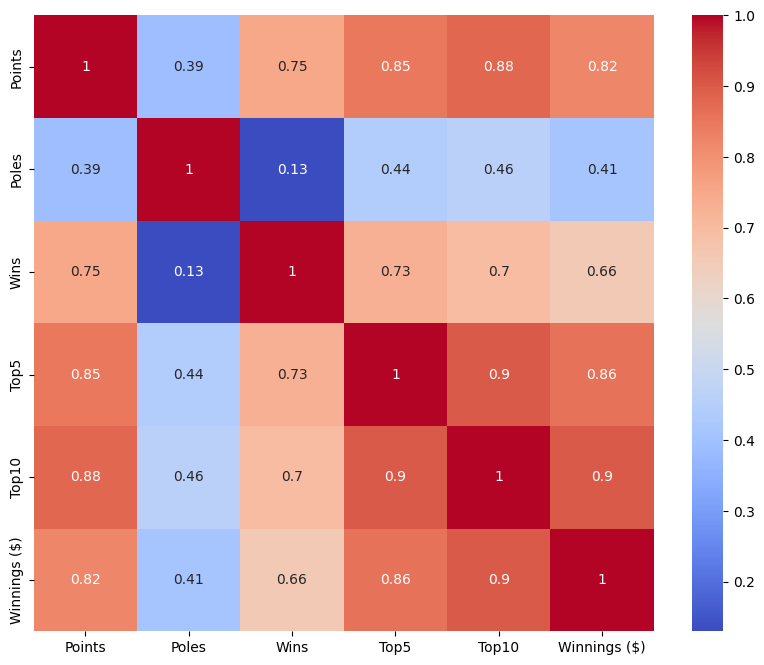

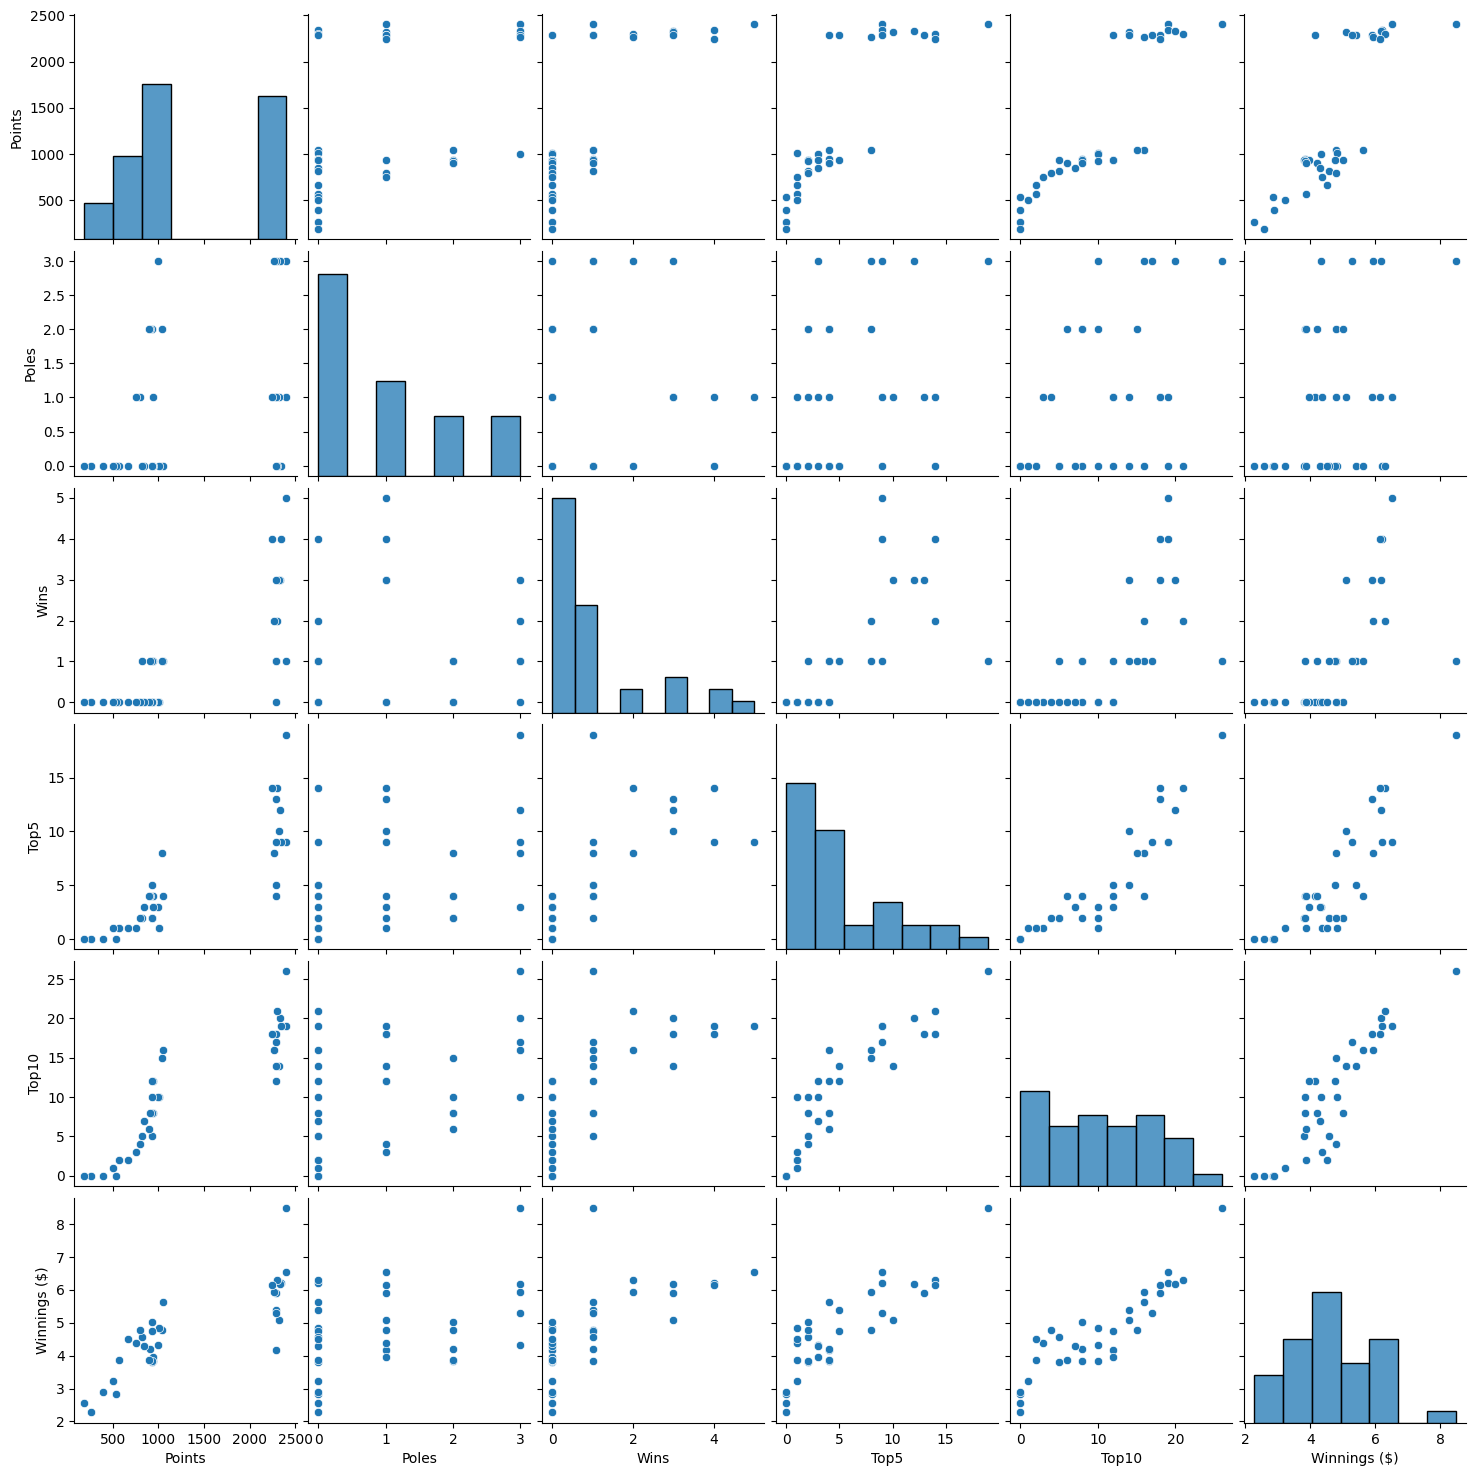

In [ ]:
# Display summary statistics for numeric variables
print(car_dat_num.describe())

# Compute correlations
cormat = car_dat_num.corr()

# Round correlation matrix to 2 decimal places
cormat = cormat.round(2)

# Plot correlation matrix using a heatmap
plt.figure(figsize = (10,8))
sns.heatmap(cormat,annot=True, cmap = 'coolwarm')
plt.show()

# Create scatterplot matrix
sns.pairplot(car_dat_num.iloc[:,:6])
plt.show()

Fit Full Regression Model

In [ ]:
# Perform linear regression
X = car_dat_num.drop(columns=['Winnings ($)'])
y = car_dat_num['Winnings ($)']
X = sm.add_constant(X)
reg1 = sm.OLS(y, X).fit()

# Display regression summary
print(reg1.summary())


                            OLS Regression Results                            
Dep. Variable:           Winnings ($)   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     26.57
Date:                Thu, 29 Aug 2024   Prob (F-statistic):           5.32e-10
Time:                        12:37:15   Log-Likelihood:                -27.934
No. Observations:                  35   AIC:                             67.87
Df Residuals:                      29   BIC:                             77.20
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1134      0.227     13.701      0.0

Calculate Variance Inflation Factors (VIF) for full model

In [ ]:
vifres = pd.DataFrame()
vifres["Variable"] = X.columns
vifres["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vifres)


  Variable       VIF
0    const  5.183090
1   Points  5.595687
2    Poles  1.431099
3     Wins  2.770014
4     Top5  6.233818
5    Top10  7.453503


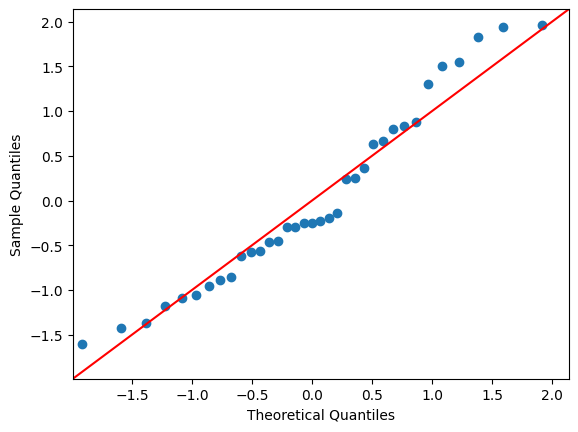

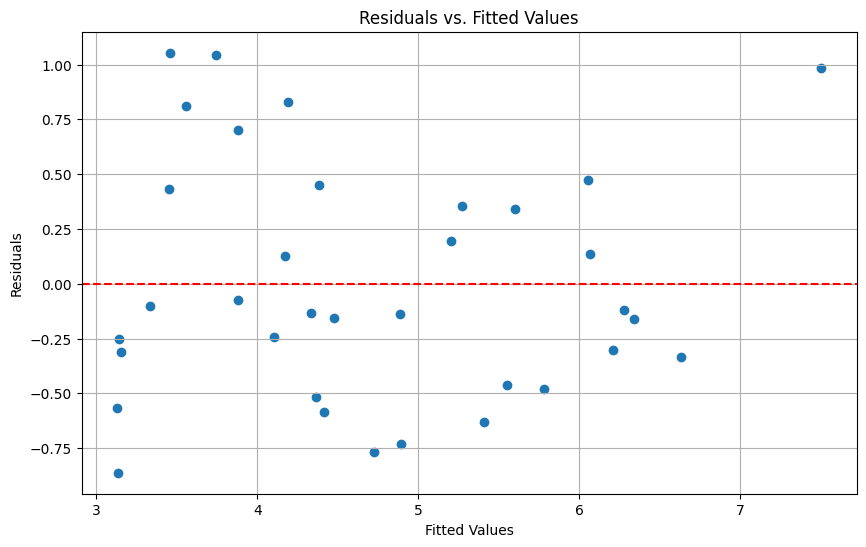

In [ ]:
# Calculate residuals
residuals = reg1.resid

# Generate Q-Q Plot
fig = sm.qqplot(residuals, fit=True, line='45')
plt.show()


# Residuals vs. Fitted
plt.figure(figsize=(10, 6))
plt.scatter(reg1.fittedvalues, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.grid(True)
plt.show()